# Sales Forecasting Training

## Preliminary
We will try to find out the methods to get in Sales forecasting. For this training, we will use data from `Kaggle` with the details : <br>
<https://www.kaggle.com/c/demand-forecasting-kernels-only>
<br> with the name of competition is `Store Item Demand Forecasting Challenge`. THey want us to predict 3 months of item sales at different stores. Let's try em' all.
<br> For the first time, we will Sarimax.

## Season I
This kernel is what I wrote method of time series analysis that I know.

The order of explain is as follows.
1. Overview of the data
2. Model choice
3. Correlograms
4. ARIMA
5. SARIMA
6. Make featrues - Phase 1
7. ARIMAX
8. SARIMAX
9. Model's summary check
10. Make featrues - Phase 2
11. Search best parameters
12. Submit Prediction 

### Modul Import

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import datetime as dtz

In [3]:
Compile_date = dtz.datetime.now()
print('The last date we try to compile this code at :',Compile_date)

The last date we try to compile this code at : 2019-12-02 13:47:55.421753


In [4]:
# Make pandas display in scientific format for all continuous computing
pd.options.display.float_format = '{:.0f}'.format

### Data Preparation

In [9]:
import chardet as ch
rawdata = open('./DATA/RAW.csv','rb').read()
result = ch.detect(rawdata)
charenc = result['encoding']
print('your csv data encode by',charenc)

your csv data encode by ascii


In [14]:
dfmy = pd.read_csv('./DATA/RAW.csv', delimiter = ';', encoding=charenc)

### Overview of Data

In [20]:
display(dfmy.describe())
display(dfmy.head(5))
print('Type of Data in each columns :')
display(dfmy.dtypes)
print('The number of NaN in data :')
display(dfmy.isna().sum())

,No,AC,Monthly
count,102239,102239,102239
mean,51120,1011326307378,5724675
std,29514,270408538,61125496
min,1,1011000000000,0
25%,25560,1011010000000,0
50%,51120,1011400000000,1
75%,76680,1011600000000,472468
max,102239,1012000000000,4695129768


,No,Period,AC,Zone,Monthly
0,1,2016 01,1011000000000,Zone 01,1284294
1,2,2016 02,1011000000000,Zone 01,1639863
2,3,2016 03,1011000000000,Zone 01,1
3,4,2016 04,1011000000000,Zone 01,1995432
4,5,2016 05,1011000000000,Zone 01,5365377


Type of Data in each columns :


No           int64
Period      object
AC         float64
Zone        object
Monthly    float64
dtype: object

The number of NaN in data :


No         0
Period     0
AC         0
Zone       0
Monthly    0
dtype: int64

In [21]:
print('Value count of Article Code :\n')
display(dfmy['AC'].value_counts())
print('Value count of Zone ID :\n')
display(dfmy['Zone'].value_counts())

Value count of Article Code :



1011600000000    28596
1011000000000    23360
1011400000000    18294
1011100000000    13724
1011810000000     4815
1011200000000     4339
1011010000000     4119
1011700000000     2620
1011300000000     1935
1011500000000      270
1011900000000      119
1012000000000       48
Name: AC, dtype: int64

Value count of Zone ID :



National       15482
Zone 05        10809
Zone 04         8810
Zone 02A        8580
Zone 01         8536
Zone 07         8479
Zone 08         8283
Zone 03         8200
Zone 06         7999
Zone 09         7827
Zone 02B        5383
Zone 02 AFH     3851
Name: Zone, dtype: int64

In [29]:
display(dfmy.groupby(['Zone','AC']).describe())

No                                           \
                          count   mean   std    min    25%    50%    75%   
Zone        AC                                                             
National    1011000000000  2387  90023  4986  86758  87354  87951  88548   
            1011010000000   478  92423  5446  88726  88845  88964 100404   
            1011100000000  1281  91646  4474  89062  89382  89702  90022   
            1011200000000   440  93947  5096  90118  90228  90338 100542   
            1011300000000   226  92104  3816  90406  90462  90518  90575   
            1011400000000  2289  92768  3019  90598  91170  91742  92314   
            1011500000000   135  99330    39  99263  99296  99330  99364   
            1011600000000  6327  96243  2632  92566  94148  95729  97310   
            1011700000000  1026  98355   917  97462  97718  97974  99038   
            1011810000000   839  99325  1288  98182  98392  98601 100022   
            1011900000000    30 101376     9 101362 101369 101376 101384   
            1012000000000    24 101886     7 101874 101880 101886 101891   
Zone 01     1011000000000  2073  15052 20665      1   4359   8765  13411   
            1011010000000   332  42031 29807  16033  16500  17446  75334   
            1011100000000  1265  31662 22305  17713  20333  22569  25189   
            1011200000000   404  41174 21686  26449  27318  27898  72829   
            1011300000000   187  45297 16891  28705  28752  29326  59620   
            1011400000000  1693  42302 14113  29713  33400  36847  40150   
            1011600000000  1960  57083 13586  41425  45899  51380  67317   
            1011700000000   144  54120   315  53713  53749  54120  54492   
            1011810000000   478  68597 11947  58128  58623  59072  83171   
Zone 02 AFH 1011000000000   206  47343 32185  11665  14308  75286  78236   
            1011100000000    94  42395 16796  26017  26040  26064  59460   
            1011400000000  1904  37513  9593  30097  32589  35608  38196   
            1011700000000   978  58198  6807  53761  54005  54682  61799   
            1011810000000   669  65644 11073  54865  55368  55823  72009   
Zone 02A    1011000000000  2010  20904 26104     49   4775   9262  15236   
            1011010000000   360  43039 28447  16081  16555  17508  74031   
            1011100000000  1136  28411 18494  17761  19965  22216  24804   
            1011200000000   282  39030 17526  26497  26951  27406  59503   
...                         ...    ...   ...    ...    ...    ...    ...   
Zone 06     1011810000000   353  71023 11321  58269  58545  68887  84083   
Zone 07     1011000000000  2123  14969 20314    337   4276   9078  13736   
            1011010000000   472  42656 27080  16369  17255  17708  74258   
            1011100000000  1238  35426 24673  18049  20806  23372  26369   
            1011200000000   382  46502 24517  26785  27360  28272  77176   
            1011300000000   154  48933 25320  29041  29079  29598  80122   
            1011400000000  1815  41078 13845  30001  32662  36092  39666   
            1011600000000  1697  58424 12948  40561  47321  57550  68622   
            1011700000000    48  54360    14  54337  54349  54360  54372   
            1011810000000   550  65567 13193  54961  55194  55620  83035   
Zone 08     1011000000000  2076  20356 25579    385   5560  10014  14709   
            1011010000000   328  48502 28450  16417  16883  63786  74295   
            1011100000000  1255  38474 24866  18097  20858  24244  64246   
            1011200000000   407  41982 22168  26833  27702  28284  74536   
            1011300000000   181  53390 25648  29089  29134  29659  79279   
            1011400000000  1977  49791 17306  30049  34767  39389  66029   
            1011500000000   135  67119    39  67052  67086  67119  67152   
            1011600000000  1495  57024 13124  41665  46982  51628  61670   
            1011700000000    48  54408    14  54385  54397  54408  54420   
 

### Make Train Data

In [38]:
Train = dfmy[(dfmy['AC']==1011600000000) & (dfmy['Zone']=='National')].copy()
Train.head(10)

,No,Period,AC,Zone,Monthly
92565,92566,2016 01,1011600000000,National,12608
92566,92567,2016 02,1011600000000,National,9
92567,92568,2016 03,1011600000000,National,11
92568,92569,2016 04,1011600000000,National,14816
92569,92570,2016 05,1011600000000,National,12
92570,92571,2016 06,1011600000000,National,4112
92571,92572,2016 07,1011600000000,National,0
92572,92573,2016 08,1011600000000,National,1
92573,92574,2016 09,1011600000000,National,0
92574,92575,2016 10,1011600000000,National,0


In [39]:
x2 = list(set((Train.columns.values).tolist())-set(['date']))
x3 = []
x4 = []
for i in range(len(x2)) :
    x1 = Train[x2[i]].unique().tolist()
    x3.append(len(x1))
    x4.append(Train[x2[i]].isnull().sum())
Num_Uniq = pd.DataFrame({'Feature':x2,'Num_Unique':x3,'Missing_Value':x4})
print('Statistics description of Number of unique category in Features :')
display(Num_Uniq.describe())
display(Num_Uniq.describe(include='O'))
display(Num_Uniq['Feature'].value_counts())

Statistics description of Number of unique category in Features :


,Num_Unique,Missing_Value
count,5,5
mean,2130,0
std,2984,0
min,1,0
25%,1,0
50%,48,0
75%,4274,0
max,6327,0


,Feature
count,5
unique,5
top,AC
freq,1


AC         1
Monthly    1
Period     1
No         1
Zone       1
Name: Feature, dtype: int64

Let's see overview of the data. We can use seasonal_decompose method to separate into four graphs(Observed,Trend,Seasonal,Residual).  
What is seasonal_decompose method parameter 'freq'?
- freq = 365 days : trend of year.  
- freq = 30 days : trend of month.  
- freq = 7 days : trend of week.  

We choose 'freq=365' ,because this data is long term.


Frequency 365


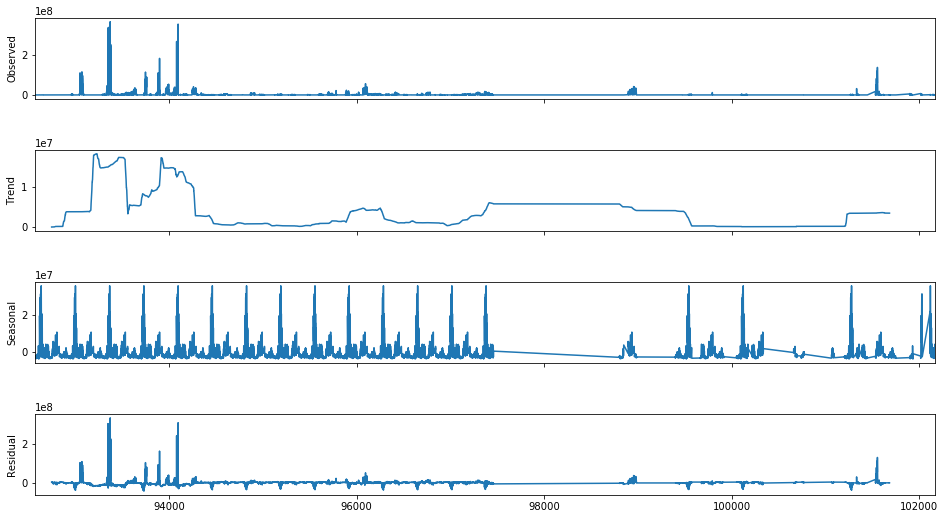

_______________________________________________________________________________________________________________________________________________________________________________

Frequency 30


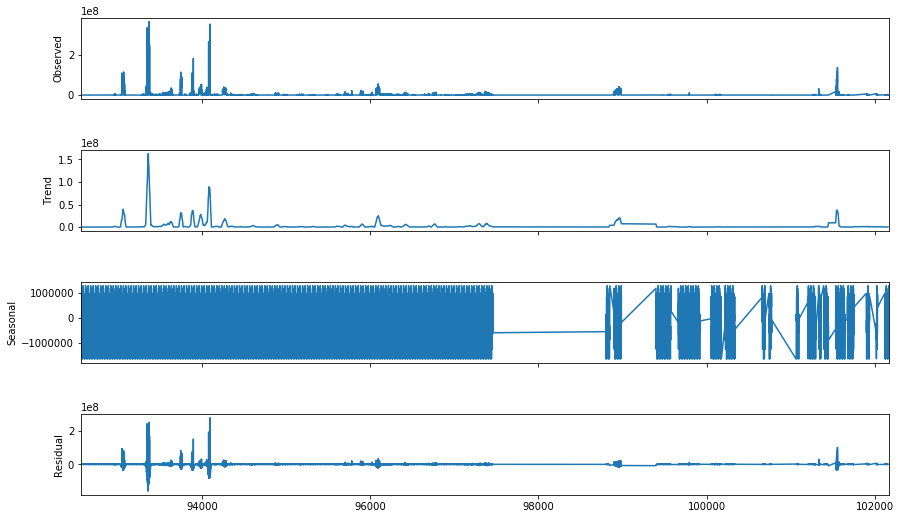

_______________________________________________________________________________________________________________________________________________________________________________

Frequency 7


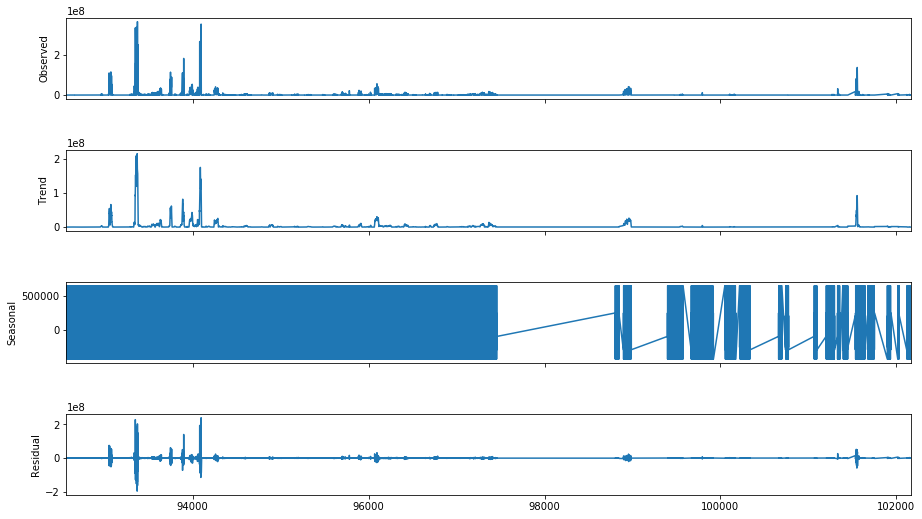

_______________________________________________________________________________________________________________________________________________________________________________


In [41]:
season = [365, 30, 7]
for alp in season :
    print('\nFrequency',alp)
    res = sm.tsa.seasonal_decompose(Train.Monthly.dropna(),freq=alp)
    fig = res.plot()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    plt.show()
    print('_'*175)

### Sampling for Model in General
We try to use the the model for Store 1 and items 1 only

In [11]:
#Train and Split again for the Data
#tr_start,tr_end = '2015-01-01','2017-09-30' #training boundary date
#te_start,te_end = '2017-10-01','2017-12-31' #test boundary date
#TRAIN01 = dfmy['sales'][tr_start:tr_end].dropna() #We try to make training data again came from start time dan date time
#TEST01 = dfmy['sales'][te_start:te_end].dropna() #Make test data from the boundary train

In [47]:
Train.dtypes

No           int64
Period      object
AC         float64
Zone        object
Monthly    float64
dtype: object

### Model Choice
each models have parameters.
- ARMA model:(p,q)
- ARIMA model:(p,d,q)
- SARIMA model:(p,d,q)(sp,sd,sq,s)
- ARIMAX model:(p,d,q) + exog
- SARIMAX model:(p,d,q)(sp,sd,sq,s) + exog

We have to choice a model, *After we comfirm that a data has a trend(is stationary) or not.*
<br/>For example, ARMA model is premised that the data is stationary.
We can use ADF-test to check stationary of the data.
<br/>It's important to choose carefully a period of the data which will be used in predicting. **Because, The results depend on the period.**

In [48]:
#ADF-test(Original-time-series) for the Train Data
'''
an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present 
in a time series sample. The alternative hypothesis is different depending on which version 
of the test is used, but is usually stationarity or trend-stationarity. It is an augmented 
version of the Dickey–Fuller test for a larger and more complicated set of time series models.
* The null hypothesis is NOT rejected as the p-value is greater than 0.05.
* A time series Y_t (t=1,2...) is said to be stationary (in the weak sense) if its statistical 
properties do not vary with time (expectation, variance, autocorrelation). The white noise is 
an example of a stationary time series, with for example the case where Y_t follows a normal 
distribution N(mu, sigma^2) independent of t.
'''
print('Null hypothesis is series possesses a unit root and hence is not stationary.')
adft1 = sm.tsa.adfuller(Train['Monthly'].dropna(),regression='ct') #drop the NA row, and do regression for constant and trend
print('We got p-value:{}'.format(adft1[1]))
if adft1[1] < .05 :
    print('So, we rejected the Null hypothesis')
else: print('The Null hypthosis is not rejected')

Null hypothesis is series possesses a unit root and hence is not stationary.
We got p-value:8.302765583788836e-18
So, we rejected the Null hypothesis


In [49]:
#ADF-test(differenced-time-series) for the Train Data
print('Null hypothesis is series possesses a unit root and hence is not stationary.')
adft2 = sm.tsa.adfuller(Train['Monthly'].diff().dropna(),regression='c') #drop the NA row, and do regression for constant only
print('We got p-value:{}'.format(adft2[1]))
if adft2[1] < .05 :
    print('So, we rejected the Null hypothesis')
else: print('The Null hypthosis is not rejected')

Null hypothesis is series possesses a unit root and hence is not stationary.
We got p-value:2.150951001445652e-30
So, we rejected the Null hypothesis


It's important to choose carefully a period of the data which will be used in predicting. Because, The results depend on the period.

What is adfuller method parameter 'regression'?
- c : constant only (default)
- ct : constant and trend
- ctt : constant, and linear and quadratic trend
- nc : no constant, no trend

[ADFuller Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) 

Usually, We try to testing both data Original and Diff.<br/>  
Like the results above, When Original-data is not stationary and Diff-data is stationary,
<br/>the time series is called unit root process. 
<br/>For unit root process, We use ARIMA or SARIMA model.
<br/>From results,We decided that Original time series is not stational.    
<br/>We will try to using ARIMA model.

### Correlograms
Autocorrelogram & Partail Autocorrelogram is useful that to estimate each models parameters.

In the analysis of data, a correlogram is an image of correlation statistics. For example, in time series analysis, a correlogram, also known as an autocorrelation plot, is a plot of the sample autocorrelations r_{h} versus h (the time lags).

If cross-correlation is used, the result is called a cross-correlogram. The correlogram is a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

In addition, correlograms are used in the model identification stage for Box–Jenkins autoregressive moving average time series models. Autocorrelations should be near-zero for randomness; if the analyst does not check for randomness, then the validity of many of the statistical conclusions becomes suspect. The correlogram is an excellent way of checking for such randomness.

Most of us know how to use ACF and PACF plots to obtain the values of p and q to feed into the AR-I-MA model, but we lack the intuition behind why we use PACF and ACF to obtain p and q respectively and not the other way around. ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a 'complete auto-correlation plot'.

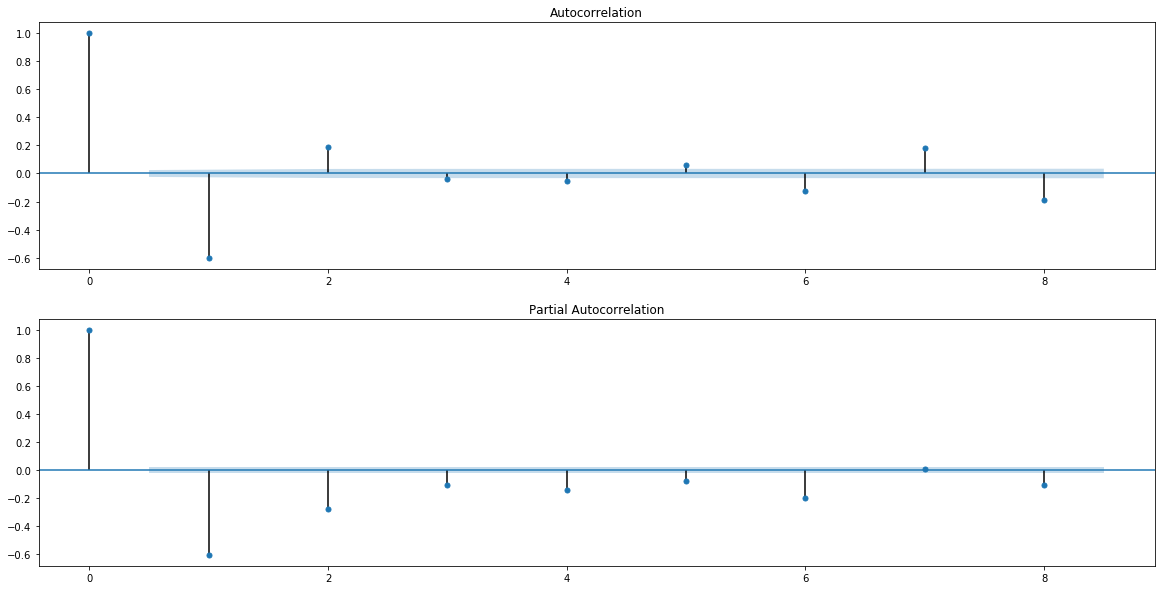

In [50]:
#we use tra.diff()(differenced data), because this time series is unit root process.
Train01 = Train['Monthly'].copy()
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(Train01.diff().dropna(), lags=8, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(Train01.diff().dropna(), lags=8, ax=ax[1])
fig.show()

That you see in the ACF plot, for the lag 0 has correlation 1 because it's compared by itself. Lag 1 has correlation -0.4. Till lag 7, we have the first hight as 0.5 for the correlation. The cutoff is 0.5 and -0.5. We could say p is a lag time series from Autoregressive, so p is 7. We get first lowest lag in lag 6 for PACF, we said the integratation between AR & MA is 7-6 = 1 as i. 

The ACF plot you provided may suggest an MA(2). I would guess that you have some significant AR orders just looking at the sinusoidal decay in auto-correlation. But all this is extremely speculative since the coefficients become insignificant very quickly as lag increases. Seeing the PACF would be very helpful.

Another important thing you want to watch for is significance in the 4th lag on the PACF. Since you have quarterly data, significance in the 4th lag is a sign of seasonality. For example if your investment is a gift store, returns may higher during the holidays (Q4) and lower during the beginning of the year (Q1), causing correlation between identical quarters.

The significant coefficients for smaller lags in the ACF plot should stay the same as your data size increases assuming nothing changes with the investment. Higher lags are estimated with less data points then are lower lags (i.e every lag looses a data point), so you can use the sample size in the estimation of each lag to guide your judgment as to which will stay the same and which are less reliable.

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

how to compute partial autocorrelation?
The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

In [18]:
#resDiff = sm.tsa.arma_order_select_ic(TRAIN01, max_ar=7, max_ma=7, ic='aic', trend='c')
#print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [19]:
#xtest = TRAIN01['2017-09-01':'2017-09-01']
#print(xtest.head())
#print(xtest.shape)
#print(TRAIN01.shape)

date
2017-09-01   38
2017-09-01   42
2017-09-01   33
2017-09-01   31
2017-09-01   17
Name: sales, dtype: float64
(500,)
(502000,)


In [53]:
resDiff = sm.tsa.arma_order_select_ic(Train01, max_ar=10, max_ma=10, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (10, 10) is the best.


In [61]:
Train01.describe()

count        6327
mean      3575713
std      19036709
min             0
25%             0
50%          1704
75%       1250805
max     369190912
Name: Monthly, dtype: float64

arma_order_select_ic : 
<br/> Returns information criteria for many ARMA models. It uses to calculate the (p,q) order for the ARMA model, we were using for loop to loop over the different companies that are in each column of the data-frame.

We will try the Arch and Garch Model. Let's Do the testing

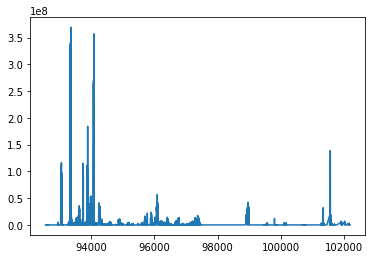

In [55]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
seed(1)
# create dataset
data = Train01.copy()
plt.plot(data)
plt.show()

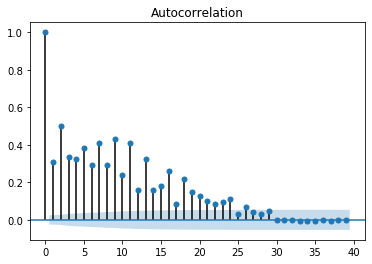

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
# square the dataset
squared_data = [x**2 for x in data]
# create acf plot
sqz = pd.DataFrame(squared_data)
plot_acf(sqz)
plt.show()

### Autocorrelation

We know there is an autocorrelation in the variance of the contrived `dataset`.
Nevertheless, we can look at an autocorrelation plot to confirm this expectation.
Running the example creates an autocorrelation plot of the squared observations. We see significant positive correlation in variance out to perhaps 26 lag time steps.
This might make a reasonable value for the parameter in the ARCH model.

### ARCH Model
Developing an ARCH model involves three steps:
1. Define the model
2. Fit the model
3. Make a forecast.
Before fitting and forecasting, we can split the dataset into a train and test set so that we can fit the model on the train and evaluate its performance on the test set.

In [95]:
#We divide the 80% as Training data and 20% for Test Data
n_test = (Train01.count() * 0.2).astype('int64').tolist() #for count of testing variable
train, test = data[-n_test:], data[:-n_test]

A model can be defined by calling the arch_model() function. We can specify a model for the mean of the series: in this case mean='Zero' is an appropriate model. We can then specify the model for the variance: in this case vol=’ARCH’. We can also specify the lag parameter for the ARCH model: in this case p=26.

Note, in the arch library, the names of p and q parameters for ARCH/GARCH have been reversed.

In [96]:
from arch import arch_model
model = arch_model(train, mean='Zero', vol='ARCH', p=26)
model_fit = model.fit()

Iteration:      1,   Func. Count:     29,   Neg. LLF: 20400.30639561936
Iteration:      2,   Func. Count:     59,   Neg. LLF: 20370.580041921414
Iteration:      3,   Func. Count:     89,   Neg. LLF: 20329.88508247849
Iteration:      4,   Func. Count:    119,   Neg. LLF: 20293.23293693414
Iteration:      5,   Func. Count:    149,   Neg. LLF: 20286.966248455145
Iteration:      6,   Func. Count:    178,   Neg. LLF: 20260.062446944656
Iteration:      7,   Func. Count:    210,   Neg. LLF: 20249.48823724745
Iteration:      8,   Func. Count:    248,   Neg. LLF: 20248.21685059408
Iteration:      9,   Func. Count:    278,   Neg. LLF: 20247.638204194933
Iteration:     10,   Func. Count:    308,   Neg. LLF: 20247.592427488984
Iteration:     11,   Func. Count:    338,   Neg. LLF: 20247.034126019258
Iteration:     12,   Func. Count:    367,   Neg. LLF: 20246.669806793496
Iteration:     13,   Func. Count:    397,   Neg. LLF: 20246.60921784362
Iteration:     14,   Func. Count:    427,   Neg. LLF: 202

C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [97]:
yhat = model_fit.forecast(horizon=n_test)

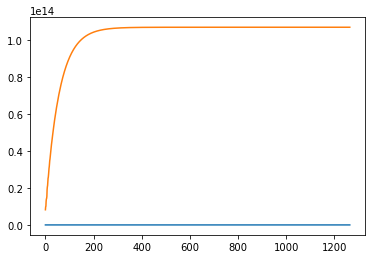

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                Monthly   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -20246.1
Distribution:                  Normal   AIC:                           40546.3
Method:            Maximum Likelihood   BIC:                           40685.1
                                        No. Observations:                 1265
Date:                Mon, Dec 02 2019   Df Residuals:                     1238
Time:                        16:35:38   Df Model:                           27
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.2021e+12  9.420e+11      8.707  3.109e-18 

In [106]:
# plot the actual variance
var = [i*0.01 for i in range(0,n_test)]
plt.plot(var[-n_test:])
# plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()
print(model_fit.summary())

In [107]:
forecasts = model_fit.forecast(horizon=n_test, method='simulation', simulations=4)
sims = forecasts.simulations

In [111]:
sims.align

AttributeError: 'ARCHModelForecastSimulation' object has no attribute 'align'

In [101]:
from sklearn.metrics import accuracy_score
pred_acc = accuracy_score(test,yhat)
print(pred_acc)

TypeError: Expected sequence or array-like, got <class 'arch.univariate.base.ARCHModelForecast'>

In [102]:
type(yhat)

arch.univariate.base.ARCHModelForecast

In [104]:
display(yhat)

## Garch


In [ ]:
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()